The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [80]:
data['state'].value_counts(dropna=False)

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

In [81]:
# For Education cleaning data['Education '].unique()

data['education'].unique()

def clean(x):
    if x in ['Bachelors']:
        return 'Bachelor'
    else:
        return x

data['education'] = list(map(clean,data['education']))
data['education'].unique()    

data['education'].value_counts(dropna=False)

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

GENDER names cleaning process 

In [82]:
data['gender'].unique()

def clean(x): 
    if x in ['female', 'Femal', 'female']: 
        return 'F' 
    elif x in ['Male']: 
        return 'M' 
    else: return x

data['gender'] = list(map(clean,data['gender'])) 
data['gender'].unique()

data['gender'].value_counts(dropna=False)


gender
F      502
M      452
NaN    117
Name: count, dtype: int64

In [83]:
# F has been choosen to fill NaNs due to the mode
data['gender']= data['gender'].fillna('F')
data['gender'].value_counts(dropna=False)

gender
F    619
M    452
Name: count, dtype: int64

In [84]:
data.isna().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      3
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [85]:
#"Sports Car", "Luxury SUV" and "Luxury Car" were replaced by "Luxury"
data['vehicle_class'].unique()

def clean(x):
    if x in ['Sports Car', 'Luxury SUV', 'Luxury Car']:
        return 'Luxury'
    else:
        return x

data['vehicle_class'] = list(map(clean,data['vehicle_class']))
data['vehicle_class'].unique()    

data['vehicle_class'].value_counts(dropna=False)

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

In [86]:
#Identify the number of unique values for each column - We did learn on 03 April, 
data.describe(include=[object]).T

,count,unique,top,freq
customer,1071,1071,RB50392,1
state,1071,5,California,331
gender,1071,2,F,619
education,1071,5,Bachelor,331
customer_lifetime_value,1068,1027,445811.34%,4
number_of_open_complaints,1071,6,1/0/00,830
policy_type,1071,3,Personal Auto,780
vehicle_class,1071,4,Four-Door Car,576


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
Customer lifetime value should be numeric*
Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [87]:
# Current type of data of the columns
#Customer lifetime value's value type is object. 
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [144]:
#unique values per columns
data.nunique()

customer                     1071
state                           5
gender                          2
education                       5
customer_lifetime_value       978
income                        774
monthly_premium_auto          132
number_of_open_complaints       6
policy_type                     3
vehicle_class                   4
total_claim_amount            761
dtype: int64

In [89]:
data[data['customer_lifetime_value'].isna()==True]

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
78,SP81997,Washington,F,Master,NaN,41275.0,96.0,1/0/00,Personal Auto,Four-Door Car,41.122303
988,GT62080,Washington,M,High School or Below,NaN,55561.0,63.0,1/0/00,Personal Auto,Four-Door Car,227.872071


In [90]:
data.describe(include=[object]).T

,count,unique,top,freq
customer,1071,1071,RB50392,1
state,1071,5,California,331
gender,1071,2,F,619
education,1071,5,Bachelor,331
customer_lifetime_value,1068,1027,445811.34%,4
number_of_open_complaints,1071,6,1/0/00,830
policy_type,1071,3,Personal Auto,780
vehicle_class,1071,4,Four-Door Car,576


In [91]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

*From the lab solutions

In [92]:
data['customer_lifetime_value']=data['customer_lifetime_value'].str.replace('%','')
data['customer_lifetime_value']=pd.to_numeric(data['customer_lifetime_value'], errors='coerce')/100
data['customer_lifetime_value']

0              NaN
1        6979.5359
2       12887.4317
3        7645.8618
4        5363.0765
           ...    
1066     3059.5503
1067    20314.9976
1068     3239.1247
1069     4626.8011
1070     8997.0402
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [93]:
new_list = []

for item in data['number_of_open_complaints']:
    new_list.append(item.split('/')[1])

data['number_of_open_complaints']=new_list
data['number_of_open_complaints']

0       0
1       0
2       0
3       0
4       0
       ..
1066    1
1067    2
1068    0
1069    0
1070    0
Name: number_of_open_complaints, Length: 1071, dtype: object

In [94]:
data['number_of_open_complaints']=pd.to_numeric(data['number_of_open_complaints'], errors='coerce')
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [145]:
# Your code here
data.isnull().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [147]:
mean = data['customer_lifetime_value'].mean()
mean

7936.905695611578

In [97]:
data['customer_lifetime_value'] = data['customer_lifetime_value'].fillna(mean)
data['customer_lifetime_value']

0        7936.902593
1        6979.535900
2       12887.431700
3        7645.861800
4        5363.076500
            ...     
1066     3059.550300
1067    20314.997600
1068     3239.124700
1069     4626.801100
1070     8997.040200
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [98]:
data['customer_lifetime_value'] = data['customer_lifetime_value'].round(decimals = 0)
data['customer_lifetime_value']

0        7937.0
1        6980.0
2       12887.0
3        7646.0
4        5363.0
         ...   
1066     3060.0
1067    20315.0
1068     3239.0
1069     4627.0
1070     8997.0
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7936.905696,6425.752807,2004.000000,4049.000000,5887.000000,8945.0,58167.000000
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.0,99960.000000
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.5,35354.000000
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.0,5.000000
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.8,2893.239678


## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [100]:
# drop_duplicates() function has been applied at the beginning
data.to_csv('cleaned_customer_data_insurance.csv', index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

Lab | Customer Analysis Round 3

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
Show DataFrame info.
Describe DataFrame.
Show a plot of the Gender breakdown.
Show a plot of Income by State.
Show a plot of the Policy Type by the Total Claim Amount.
Show a plot of the Education by Vehicle Class.
What insights can you establish from these plots?
What other plots do you feel would be beneficial?

In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [151]:
#Show DataFrame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     1071 non-null   object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1071 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   int64  
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 92.2+ KB


In [103]:
#Describe the dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7936.905696,6425.752807,2004.000000,4049.000000,5887.000000,8945.0,58167.000000
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.0,99960.000000
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.5,35354.000000
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.0,5.000000
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.8,2893.239678


<Axes: xlabel='gender', ylabel='count'>

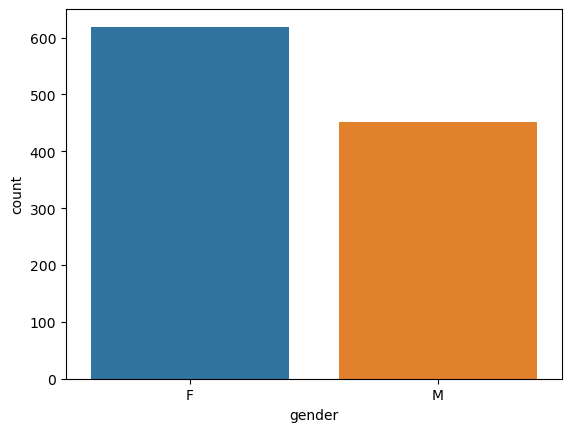

In [104]:
# Gender breakdown
sns.countplot(x='gender', data=data)
# Female cliens are more than male clients!

<Axes: xlabel='state', ylabel='income'>

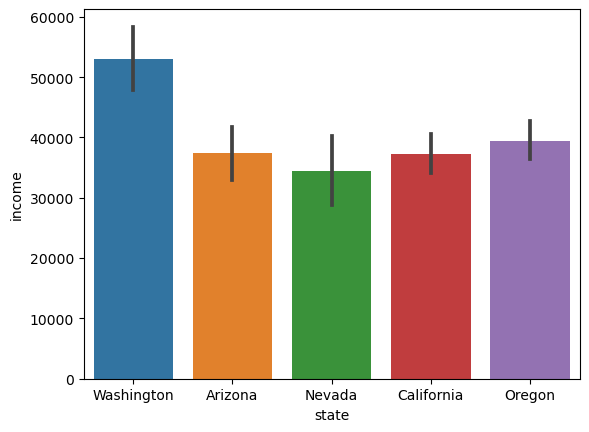

In [105]:
# Income by State
sns.barplot(y='income', x='state', data=data)
# Washington is the top state in terms of customer income value 

<Axes: xlabel='total_claim_amount', ylabel='policy_type'>

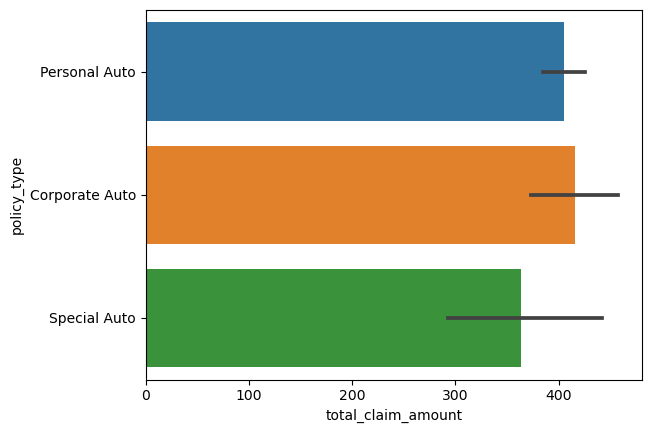

In [106]:
#the Policy Type by the Total Claim Amount
sns.barplot(x='total_claim_amount', y='policy_type', data=data)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


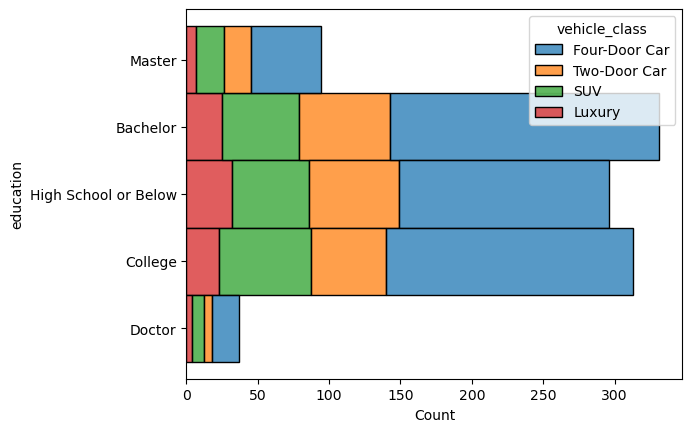

In [107]:
#Education by Vehicle Class
g = sns.histplot(y='education', hue='vehicle_class', data=data, stat="count", multiple="stack")

Lab | Customer Analysis Round 4


Complete the following task
Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution?
For the numerical variables, check the multicollinearity between the features. 
Please note that we will use the column total_claim_amount later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). 
Write code for both the correlation matrix and for seaborn heatmap. 
If there is no pair of features that have a high correlation, then do not drop any features

In [108]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
#this data has been treated with some log transformations like we have seen yesterday
data = pd.read_csv('cleaned_customer_data_insurance.csv')
data.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7937.0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6980.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7646.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323


In [110]:
#separate the features from the labels
y = data['customer_lifetime_value']
X = data.drop(['customer_lifetime_value'], axis=1)

In [152]:
X.head()

,customer,state,gender,education,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323


In [112]:
# X | Y -  Split
# -o-o-o-
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [113]:
X_cat.describe()

,customer,state,gender,education,policy_type,vehicle_class
count,1071,1071,1071,1071,1071,1071
unique,1071,5,2,5,3,4
top,RB50392,California,F,Bachelor,Personal Auto,Four-Door Car
freq,1,331,619,331,780,576


In [114]:
X_num.describe()

,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,1071.000000,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,0.394024,404.986909
std,30469.427060,1601.190369,0.883769,293.027260
min,0.000000,61.000000,0.000000,0.382107
25%,14072.000000,68.000000,0.000000,202.157702
50%,36234.000000,83.000000,0.000000,354.729129
75%,64631.000000,109.500000,0.000000,532.800000
max,99960.000000,35354.000000,5.000000,2893.239678


In [115]:
from sklearn.preprocessing import MinMaxScaler
# Scaling 
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,0.000000,0.026606,0.0,0.000803
1,0.000000,0.000935,0.0,0.390992
2,0.487865,0.001332,0.0,0.195685
3,0.000000,0.001275,0.0,0.183037
4,0.363715,0.000198,0.0,0.005838


<class 'pandas.core.frame.DataFrame'>


In [116]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1071.0,0.393114,0.304816,0.0,0.140776,0.362485,0.646569,1.0
monthly_premium_auto,1071.0,0.003747,0.045368,0.0,0.000198,0.000623,0.001374,1.0
number_of_open_complaints,1071.0,0.078805,0.176754,0.0,0.000000,0.000000,0.000000,1.0
total_claim_amount,1071.0,0.139863,0.101293,0.0,0.069750,0.122490,0.184046,1.0


In [117]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.0,99960.000000
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.5,35354.000000
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.0,5.000000
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.8,2893.239678


In [118]:
X_cat.describe().T

,count,unique,top,freq
customer,1071,1071,RB50392,1
state,1071,5,California,331
gender,1071,2,F,619
education,1071,5,Bachelor,331
policy_type,1071,3,Personal Auto,780
vehicle_class,1071,4,Four-Door Car,576


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

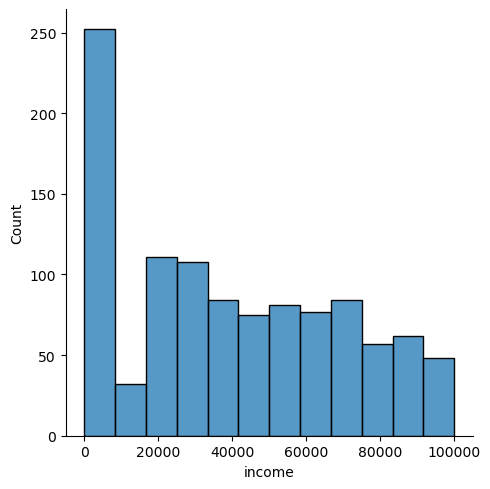

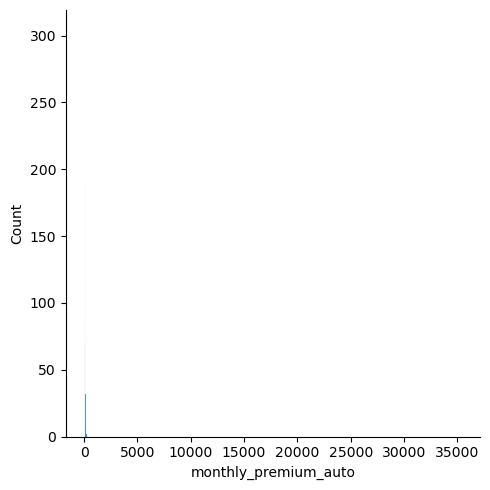

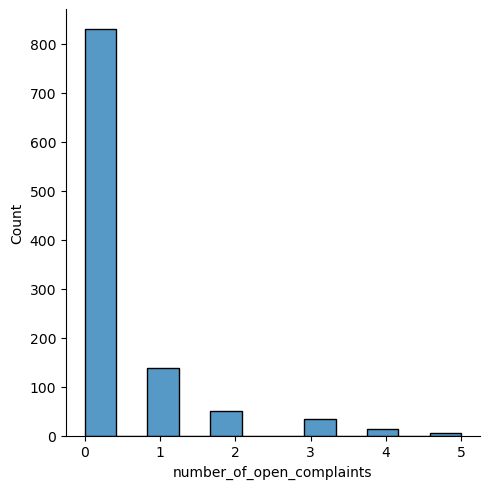

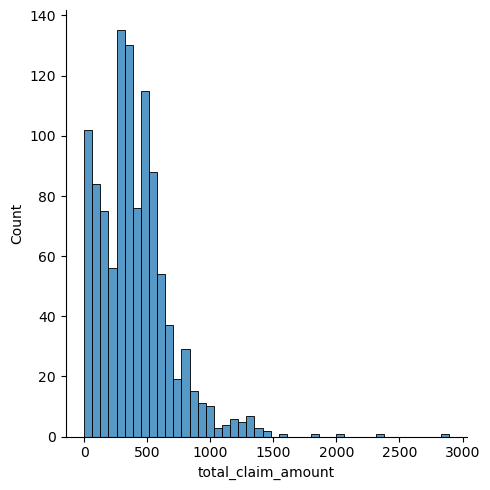

In [119]:
numerical = X_num
for cat in numerical:
    sns.displot(numerical, x= cat)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

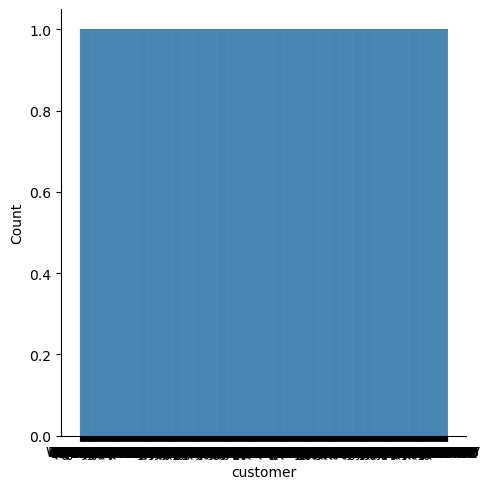

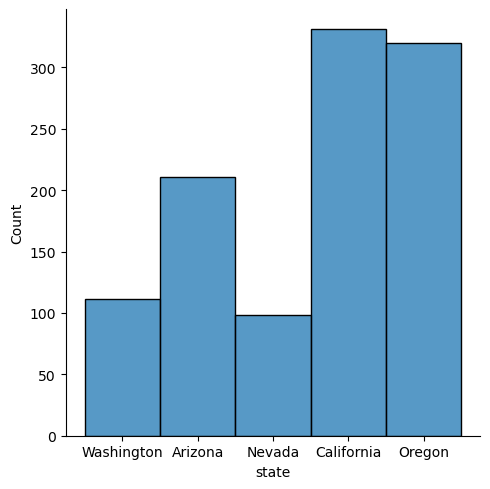

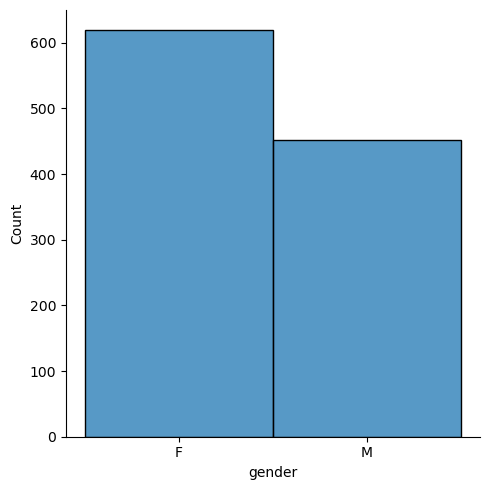

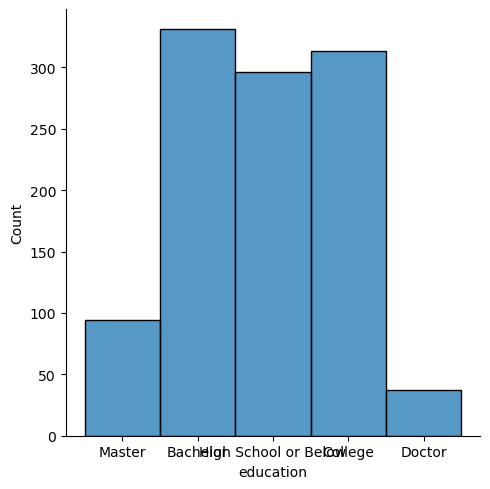

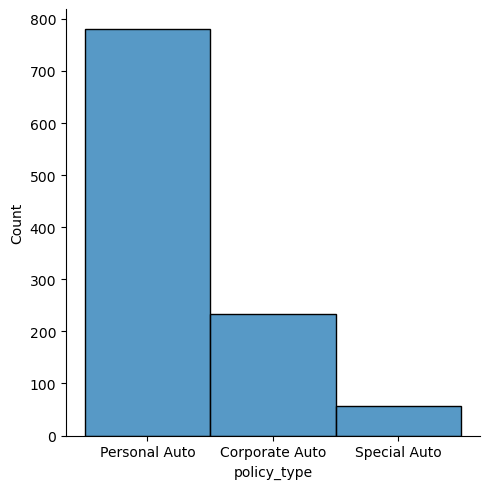

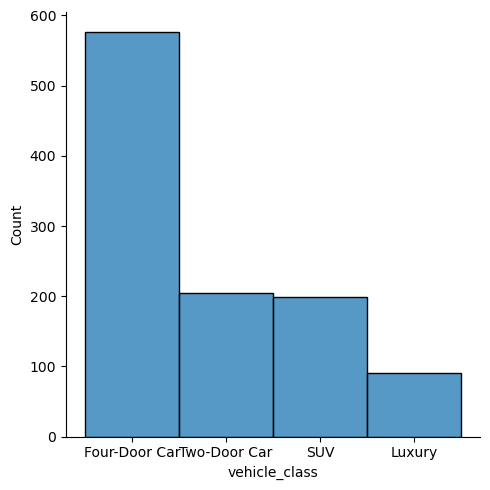

In [120]:
categorical = X_cat
for cat in categorical:
    sns.displot(categorical, x= cat)

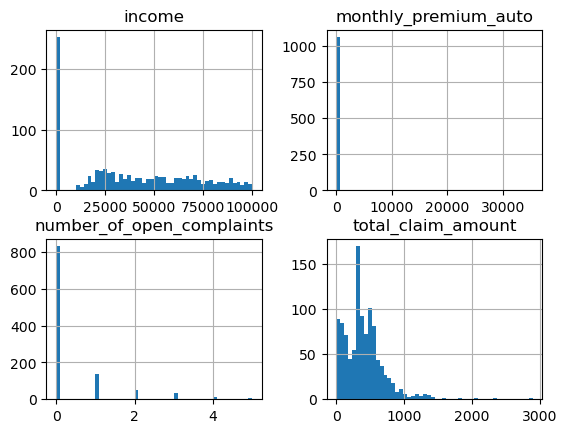

In [121]:
X_num.hist(bins=50)
plt.show()

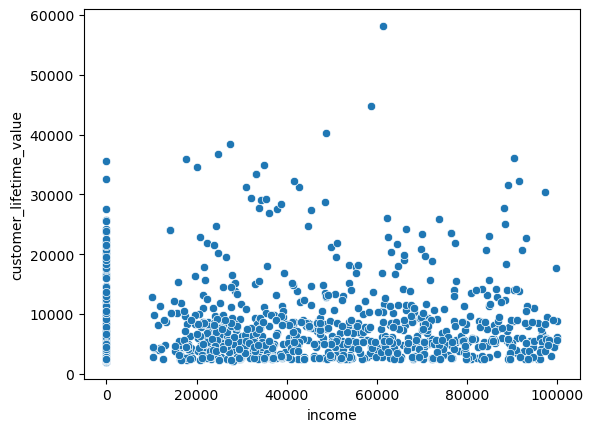

In [122]:
sns.scatterplot(x=data['income'], y=data['customer_lifetime_value'])
plt.show()

In [123]:
# as an example: removing the outliers from income (we don't always do it, only for good reasons)
# but if we want to do it, this is how:
iqr = np.percentile(data['income'],75) - np.percentile(data['income'],25)
upper_limit = np.percentile(data['income'],75) + 1.5*iqr
lower_limit = np.percentile(data['income'],25) - 1.5*iqr

In [124]:
lower_limit

-61766.5

In [125]:
upper_limit

140469.5

In [126]:
data.shape

(1071, 11)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


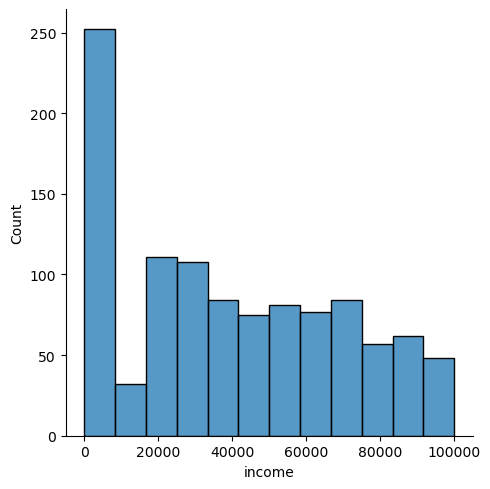

In [127]:
data1 = data[(data['income']>lower_limit) & (data['income']<upper_limit)].copy()
sns.displot(data1['income'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


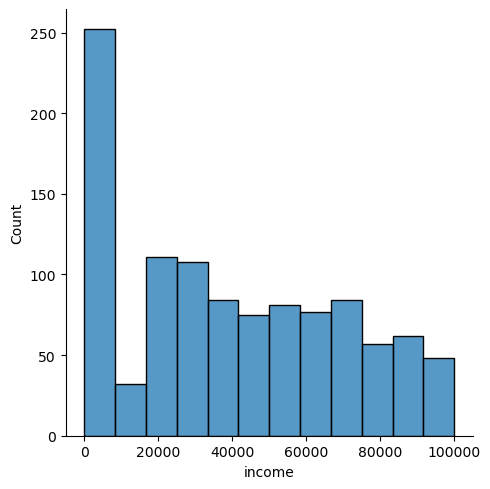

In [128]:
data2 = data[(data['income']>np.percentile(data['income'],25) - 3*iqr) & (data['income']<np.percentile(data['income'],75) + 3*iqr)].copy()
sns.displot(data2['income'])
plt.show()

In [129]:
data2.shape

(1071, 11)

In [130]:
# now actually make the change on our data for IC1
data = data[(data['income']>lower_limit) & (data['income']<upper_limit)]

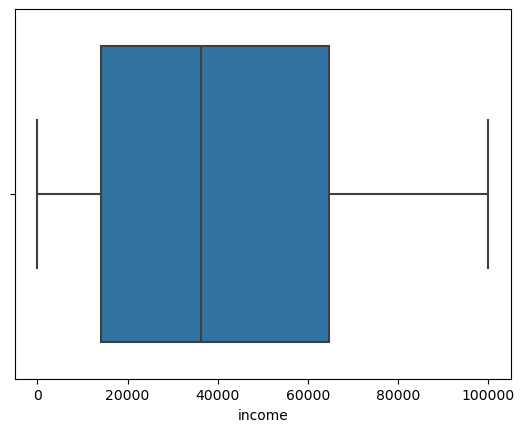

In [131]:
sns.boxplot(x=data['income'])
plt.show()

In [132]:
data['income'].describe()

count     1071.000000
mean     39295.701214
std      30469.427060
min          0.000000
25%      14072.000000
50%      36234.000000
75%      64631.000000
max      99960.000000
Name: income, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


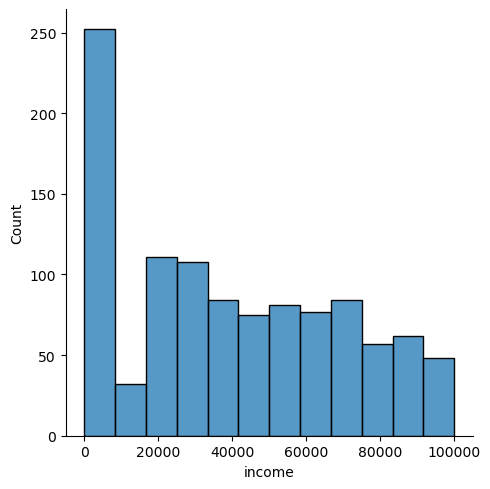

In [133]:
iqr = np.percentile(data['income'],75) - np.percentile(data['income'],25)
upper_limit = np.percentile(data['income'],75) + 1.5*iqr
lower_limit = np.percentile(data['income'],25) - 1.5*iqr
data = data[(data['income']>lower_limit) & (data['income']<upper_limit)]
sns.displot(data['income'])
plt.show()

In [134]:
 numerical.corr().T

,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
income,1.000000,0.049100,-0.004161,-0.361282
monthly_premium_auto,0.049100,1.000000,0.025138,-0.040493
number_of_open_complaints,-0.004161,0.025138,1.000000,0.008470
total_claim_amount,-0.361282,-0.040493,0.008470,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


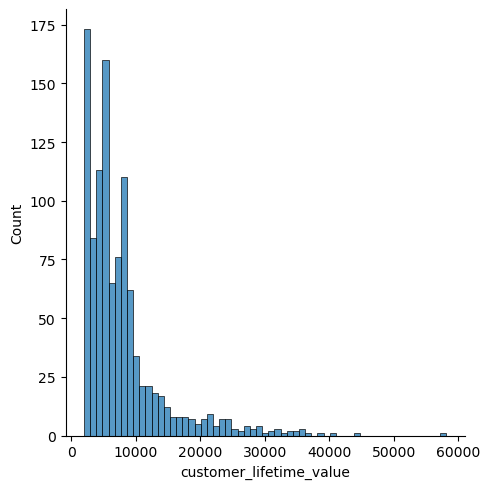

In [135]:
sns.displot(data['customer_lifetime_value'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


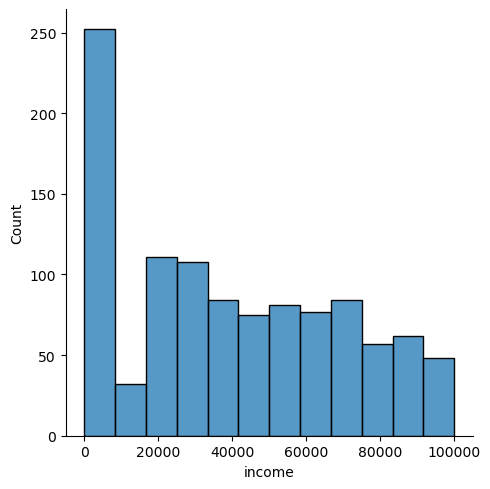

In [136]:
sns.displot(data['income'])
plt.show()

<Axes: >

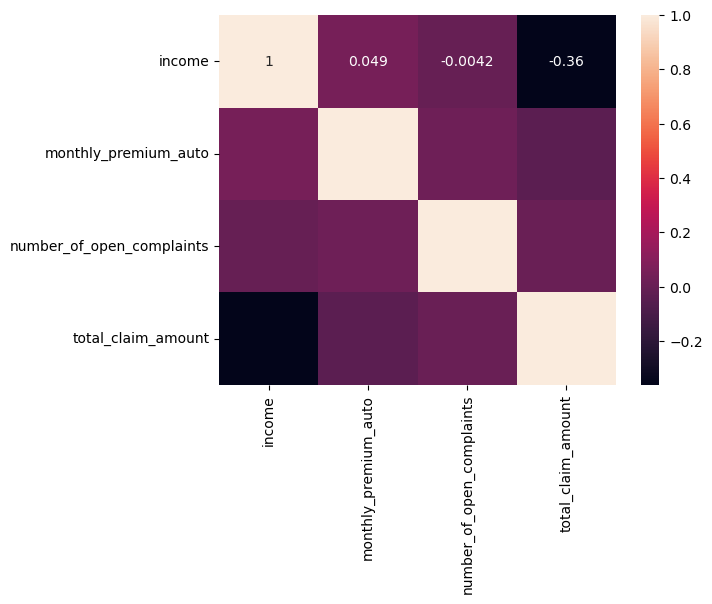

In [137]:
sns.heatmap(numerical.corr(), annot=True)

Lab | Customer Analysis Round 6

-One Hot/Label Encoding (categorical).
-Concat DataFrames

-Linear Regression
Train-test split.
Apply linear regression.

Model Validation
R2.
MSE.
RMSE.
MAE.

In [175]:
categorical

,customer,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,F,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV


In [191]:
#X = Features
from sklearn.preprocessing import MinMaxScaler #There are 3 ways to scale and normalise/transform: MinMax, Standard, Log
from sklearn.preprocessing import StandardScaler 


In [192]:
#OneHotEncoder - Encodes categorical features as a one-hot numeric array

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categorical)  #encoder - drop first column of array for hot encoded categories because the first col can be infered using the others
encoded = encoder.transform(categorical).toarray() #encoded - use encoder transform method to put categoricals into array
encoded_columns = OneHotEncoder(drop='first').fit(categorical).get_feature_names_out(input_features=categorical.columns) # this allows us to get the columns names for our encoded array

onehot_encoded_X = pd.DataFrame(encoded, columns = encoded_columns) #new onehotencoded columns X because its still features
onehot_encoded_X.head(20)

,customer_AB13432,customer_AB60627,customer_AB72731,customer_AB96670,customer_AC40767,customer_AE98193,customer_AF10970,customer_AG85615,customer_AH84063,customer_AI49188,...,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [193]:
#OneHotEncoder - Encodes categorical features as a one-hot numeric array

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categorical)  #encoder - drop first column of array for hot encoded categories because the first col can be infered using the others
encoded = encoder.transform(categorical).toarray() #encoded - use encoder transform method to put categoricals into array
encoded_columns = OneHotEncoder(drop='first').fit(categorical).get_feature_names_out(input_features=categorical.columns) # this allows us to get the columns names for our encoded array

onehot_encoded_X = pd.DataFrame(encoded, columns = encoded_columns) #new onehotencoded columns X because its still features
onehot_encoded_X.head(20)

,customer_AB13432,customer_AB60627,customer_AB72731,customer_AB96670,customer_AC40767,customer_AE98193,customer_AF10970,customer_AG85615,customer_AH84063,customer_AI49188,...,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [194]:
new_X = pd.concat([onehot_encoded_X, X_normalized], axis=1) #concat transformed dataframes called new_X
#replace one_hot_encoded_x with new_X

In [195]:
X

,customer,state,gender,education,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,79487.0,114.0,0,Special Auto,SUV,547.200000


In [196]:
#  X is transformed after scaling
X_normalized

,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,0.000000,0.026606,0.0,0.000803
1,0.000000,0.000935,0.0,0.390992
2,0.487865,0.001332,0.0,0.195685
3,0.000000,0.001275,0.0,0.183037
4,0.363715,0.000198,0.0,0.005838
...,...,...,...,...
1066,0.386595,0.000482,0.2,0.124815
1067,0.632343,0.001162,0.4,0.071534
1068,0.160674,0.000765,0.0,0.218890
1069,0.795188,0.001502,0.0,0.189023


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

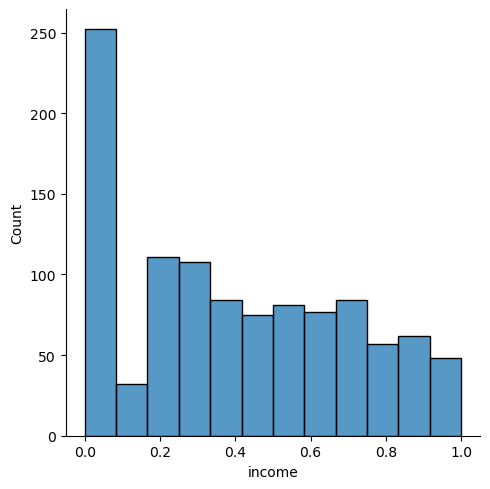

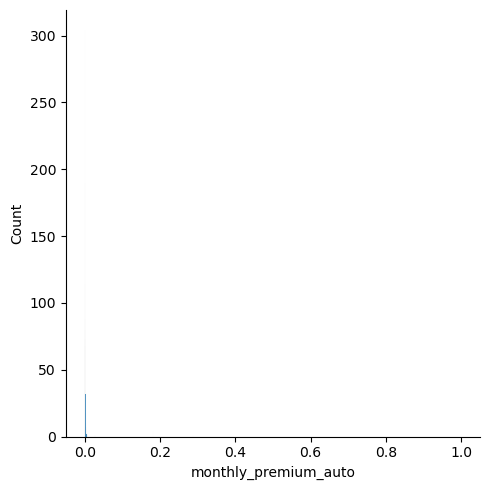

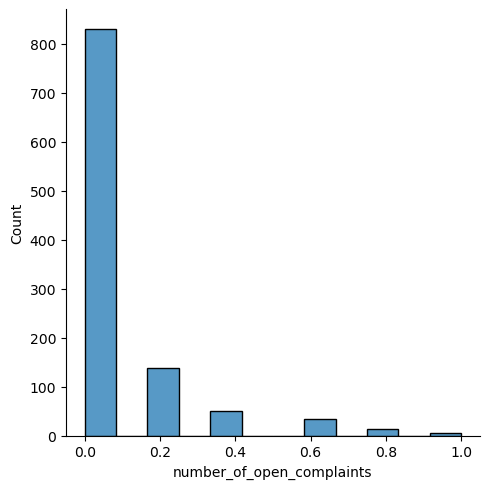

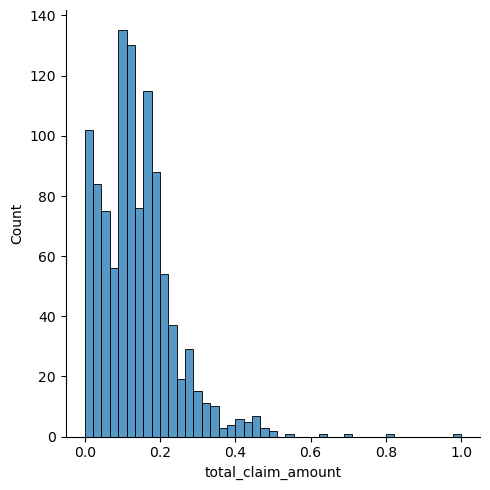

In [187]:
#new distribtion plots for X_normalized
for cat in X_normalized:
    sns.displot(X_normalized, x= cat)

In [156]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [139]:
data.head().T

,0,1,2,3,4
customer,RB50392,QZ44356,AI49188,WW63253,GA49547
state,Washington,Arizona,Nevada,California,Washington
gender,F,F,F,M,M
education,Master,Bachelor,Bachelor,Bachelor,High School or Below
customer_lifetime_value,7937.0,6980.0,12887.0,7646.0,5363.0
income,0.0,0.0,48767.0,0.0,36357.0
monthly_premium_auto,1000.0,94.0,108.0,106.0,68.0
number_of_open_complaints,0,0,0,0,0
policy_type,Personal Auto,Personal Auto,Personal Auto,Corporate Auto,Personal Auto
vehicle_class,Four-Door Car,Four-Door Car,Two-Door Car,SUV,Four-Door Car


In [140]:
#separate the features from the labels
X_cat = data.select_dtypes(include = object)

In [158]:
X_cat.head(20)

,customer,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,F,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,OC83172,Oregon,F,Bachelor,Personal Auto,Two-Door Car
6,XZ87318,Oregon,F,College,Corporate Auto,Four-Door Car
7,CF85061,Arizona,M,Master,Corporate Auto,Four-Door Car
8,DY87989,Oregon,M,Bachelor,Corporate Auto,Four-Door Car
9,BQ94931,Oregon,F,College,Special Auto,Four-Door Car


In [167]:
# why the name is 'count'? Shouldn't be 'policy type'? 
X_cat['policy_type'].value_counts()

policy_type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64

In [201]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=['Personal Auto', 'Corporate Auto','Special Auto'])
onehot_encoded.head(10) #10 column

[array(['AA71604', 'AB13432', 'AB60627', ..., 'ZX86243', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


ValueError: Shape of passed values is (1071, 1090), indices imply (1071, 3)

In [202]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=['Personal Auto', 'Corporate Auto','Special Auto'])
onehot_encoded.head(10) #20 column

#one hot encoding 
#code is not working properly -ValueError: Shape of passed values is (1071, 1090), indices imply (1071, 3) 

[array(['AA71604', 'AB13432', 'AB60627', ..., 'ZX86243', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


ValueError: Shape of passed values is (1071, 1090), indices imply (1071, 3)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=['Corporate Auto','Special Auto']))
onehot_encoded.head(20)

In [203]:
#from sklearn.preprocessing import LabelEncoder
#label_encoded = LabelEncoder().fit(X_cat).transform(X_cat) # ordered wrt value counts
#label_encoded = pd.DataFrame(label_encoded,columns=X_cat.columns)
#display(label_encoded.head(20))
#label_encoded['policy_type'].value_counts()

ValueError: y should be a 1d array, got an array of shape (1071, 6) instead.

In [ ]:
# ## train -test split | merge all this information together into a single dataset with all features, now numerical
# X = pd.concat([X_normalized, onehot_encoded], axis=1)  # np.concatenate()X_train.head()

In [ ]:
# X['Personal Auto'] = 1 -( X['Corporate Auto'] +X['Personal Auto'])

In [ ]:
# X = X.drop(['Personal Auto'], axis=1)
#X.head

In [ ]:
# y = data['customer_lifetime_value']
# y.head()

In [ ]:
#Train test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
# X_train.head()

In [ ]:
# #train/fit the model like yesterday
# lm = linear_model.LinearRegression()
# lm.fit(X_train,y_train)


In [ ]:
# from sklearn.metrics import r2_score
# predictions = lm.predict(X_train)
# r2_score(y_train, predictions)

In [ ]:
# predictions_test = lm.predict(X_test)
# r2_score(y_test, predictions_test)

In [ ]:
# y_test[:5]

In [ ]:
# predictions_test[:5]

In [ ]:
# from sklearn.metrics import mean_squared_error
#mse=mean_squared_error(y_test,predictions_test)
#mse

In [ ]:
# mae = mean_absolute_error(y_test, predictions_test)
# print(mae)

In [ ]:
# rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
# rmse

In [ ]:
# y_test.mean()

In [ ]:
# rmse/y_test.mean()

In [ ]:
# Metrics
# R2 = 
#from sklearn.metrics import mean_absolute_error, r2_score
#r2 = r2_score(y_predict,y_test) 

In [ ]:
# mse = mean_squared_error(y_predict, y_test) 

In [ ]:
# rms
# import math
# rmse = math.sqrt(mse)

In [ ]:
# mae = mean_absolute_error(y_predict,y_test)

#Modeling
#Description:

#Try to improve the linear regression model. Remember the previous rounds. 
#Follow the steps as shown in previous lectures and try to improve the accuracy of the model.

#Some approaches you can try in this exercise:
#use the concept of multicollinearity and remove insignificant variables
#use a different method of scaling the numerical variables
#use a different ratio of train test split
#use the transformation on numerical columns which align it more towards a normal distribution
